In [1]:
import os
import cv2
from backgroundremover.bg import remove
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

In [3]:
def remove_bg_cv2(input_img):
    
    #Reference https://pypi.org/project/backgroundremover/
    
    model_choices = ["u2net", "u2net_human_seg", "u2netp"]
    
    _, img_encoded = cv2.imencode('.png', input_img)
    img_bytes = img_encoded.tobytes()
    
    result = remove(img_bytes, model_name=model_choices[0],
                    alpha_matting=True,
                    alpha_matting_foreground_threshold=240,
                    alpha_matting_background_threshold=10,
                    alpha_matting_erode_structure_size=10,
                    alpha_matting_base_size=1000)
    
    result_np_arr = np.frombuffer(result, np.uint8)
    result_img = cv2.imdecode(result_np_arr, cv2.IMREAD_UNCHANGED)
    
    return result_img


def get_median_color(image):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
    
    alpha_channel = image[:, :, 3]
    mask = alpha_channel > 0  # Assuming background has alpha = 0
    
    foreground_pixels = rgb_image[mask]
    
    median_color = np.median(foreground_pixels, axis=0).astype(np.uint8)
    
    return median_color


def create_colored_square(size, color):
    square = np.zeros((size, size, 3), dtype=np.uint8)
    square[:, :] = color
    return square

In [4]:
clothes_folder = 'clothing-dataset-small/'

clothes_classes = [i for i in os.listdir(clothes_folder) if '.' not in i]
clothes_classes

['skirt',
 'longsleeve',
 'dress',
 'pants',
 't-shirt',
 'shorts',
 'hat',
 'shoes',
 'shirt',
 'outwear']

In [13]:
clothes_class = 'shirt'
clothes_class_folder = clothes_folder + clothes_class + '/'

clothes_imgs_names = os.listdir(clothes_class_folder)

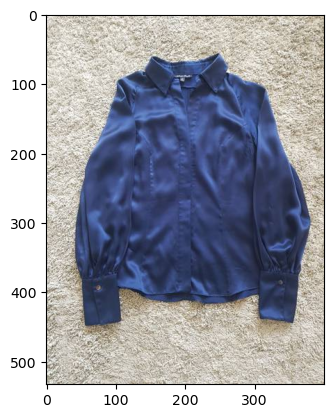

In [14]:
clothe_path = clothes_class_folder + clothes_imgs_names[1]

clothe_img = cv2.cvtColor(cv2.imread(clothe_path), cv2.COLOR_BGR2RGB)

plt.imshow(clothe_img)
plt.show()

# Removing the background

DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth


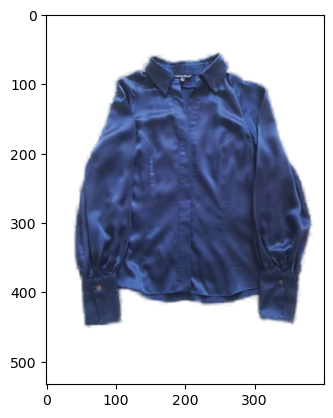

In [15]:
output_image = remove_bg_cv2(clothe_img)

plt.imshow(output_image)
plt.show()

# Exemplifying the median color

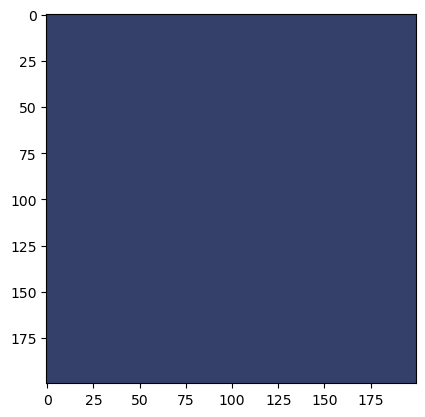

In [16]:
median_color = get_median_color(output_image)

colored_square = create_colored_square(200, median_color)

plt.imshow(colored_square)
plt.show()

# Creating the tabular dataset

In [41]:
clothes_data_list = []

for clothes_class in tqdm(clothes_classes):
    
    try:
        clothes_class_folder = clothes_folder + clothes_class + '/'

        clothes_imgs_names = os.listdir(clothes_class_folder)


        for clothes_imgs_name in clothes_imgs_names:
            clothing_path = clothes_class_folder + clothes_imgs_name

            clothe_img = cv2.cvtColor(cv2.imread(clothing_path), cv2.COLOR_BGR2RGB)
            image_no_bg = remove_bg_cv2(clothe_img)
            R_median, G_median, B_median = get_median_color(image_no_bg)

            result = {'clothes_class': clothes_class, 'clothing_path': clothing_path, 
                     'R_median': R_median, 'G_median': G_median, 'B_median': R_median}

            clothes_data_list.append(result)
    except:
        continue

  0%|                                                                                                                                                                                | 0/10 [00:00<?, ?it/s]

DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2

 10%|████████████████▋                                                                                                                                                      | 1/10 [02:30<22:35, 150.61s/it]

DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2

 20%|█████████████████████████████████▍                                                                                                                                     | 2/10 [12:30<55:16, 414.61s/it]

DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2

 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [16:34<39:18, 336.89s/it]

DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2

 40%|██████████████████████████████████████████████████████████████████▊                                                                                                    | 4/10 [19:35<27:31, 275.25s/it]

DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2

 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [26:00<26:14, 314.86s/it]

DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 6/10 [28:10<16:47, 251.95s/it]

DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [30:49<11:05, 221.80s/it]

DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 8/10 [35:08<07:46, 233.42s/it]

DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [41:23<04:37, 277.68s/it]

DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2net.pth
DEBUG: path to be checked: /Users/zerk/.u2net/u2

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [45:35<00:00, 273.51s/it]


In [43]:
df_clothes = pd.DataFrame(clothes_data_list)
df_clothes

clothes_class                                      clothing_path  \
0            skirt  clothing-dataset-small/skirt/fdbcfdcd-5deb-4a2...   
1            skirt  clothing-dataset-small/skirt/bd289469-607c-45d...   
2            skirt  clothing-dataset-small/skirt/6b6416d0-7fae-485...   
3            skirt  clothing-dataset-small/skirt/ec5f9167-6824-43c...   
4            skirt  clothing-dataset-small/skirt/a6a301fe-74f4-4a2...   
...            ...                                                ...   
2056       outwear  clothing-dataset-small/outwear/9547b148-bc78-4...   
2057       outwear  clothing-dataset-small/outwear/3395d7f5-fe79-4...   
2058       outwear  clothing-dataset-small/outwear/2b070f9a-72c6-4...   
2059       outwear  clothing-dataset-small/outwear/ed371c5e-c1ef-4...   
2060       outwear  clothing-dataset-small/outwear/05a71d78-84e9-4...   

      R_median  G_median  B_median  
0           37        30        37  
1           95        47        95  
2          120       127       120  
3           32        31        32  
4           61        63        61  
...        ...       ...       ...  
2056       129        41       129  
2057       171       187       171  
2058        71        79        71  
2059        47        50        47  
2060        77        79        77  

[2061 rows x 5 columns]

In [20]:
pd.read_csv("clothes.csv").sample(15)

clothes_class                                      clothing_path  \
332     longsleeve  clothing-dataset-small/longsleeve/1fae808a-2c2...   
2028       outwear  clothing-dataset-small/outwear/b2ee19d6-93f1-4...   
1315           hat  clothing-dataset-small/hat/e871c8b7-723e-47c3-...   
375     longsleeve  clothing-dataset-small/longsleeve/d7fabb42-59e...   
1632         shirt  clothing-dataset-small/shirt/bfbf8cba-6749-43d...   
1847         shirt  clothing-dataset-small/shirt/b628acdf-7e0d-49d...   
614          dress  clothing-dataset-small/dress/d356b8a6-b8bf-466...   
1263        shorts  clothing-dataset-small/shorts/777c856d-c9ca-4f...   
924        t-shirt  clothing-dataset-small/t-shirt/4aa553ed-5f3b-4...   
529     longsleeve  clothing-dataset-small/longsleeve/ec2c79a8-662...   
280     longsleeve  clothing-dataset-small/longsleeve/a7612191-1ce...   
1451         shoes  clothing-dataset-small/shoes/fbdddc68-0c17-47f...   
724          dress  clothing-dataset-small/dress/ea4fad11-8486-4ec...   
117     longsleeve  clothing-dataset-small/longsleeve/cd6ff00a-344...   
985        t-shirt  clothing-dataset-small/t-shirt/8b6ef17f-0669-4...   

      R_median  G_median  B_median  
332         86        76        86  
2028        82        72        82  
1315       206        92       206  
375         49        43        49  
1632       105        88       105  
1847       175       178       175  
614        136       132       136  
1263       106       117       106  
924         31        47        31  
529         81        97        81  
280        208       194       208  
1451        22        23        22  
724         35        53        35  
117        185       163       185  
985         80       112        80

In [44]:
df_clothes.to_csv("clothes.csv", index = False)

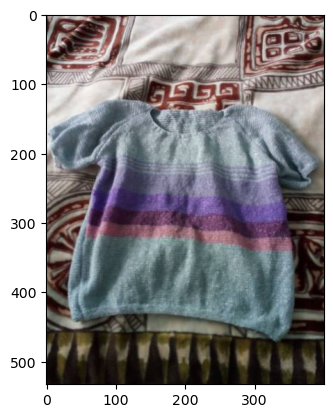

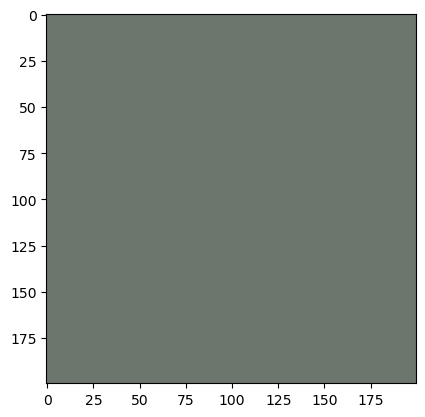

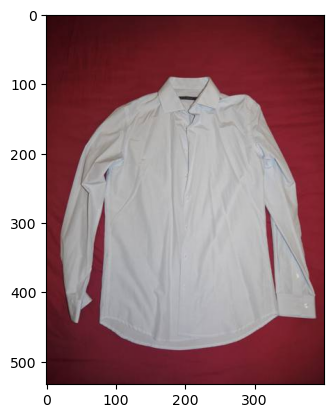

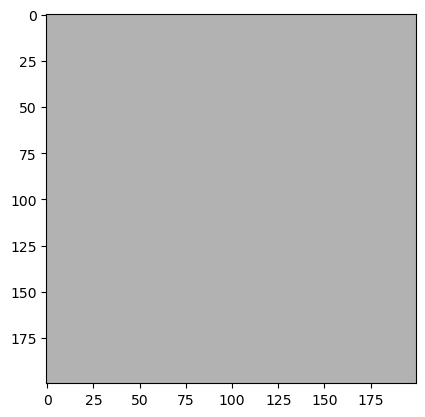

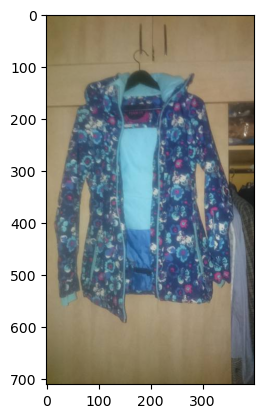

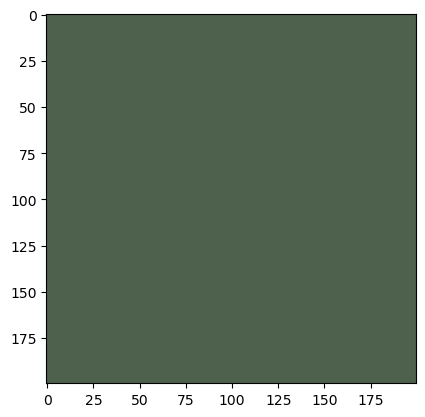

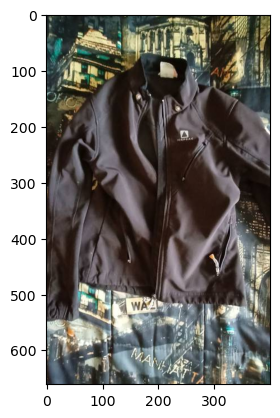

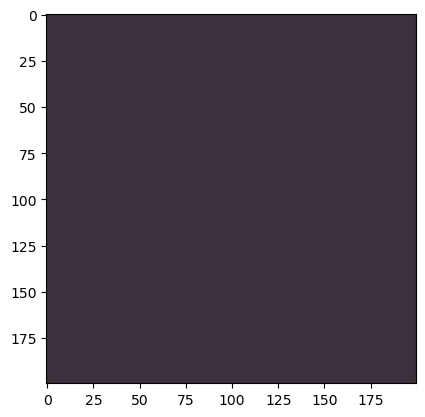

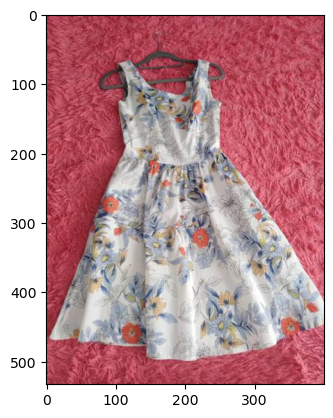

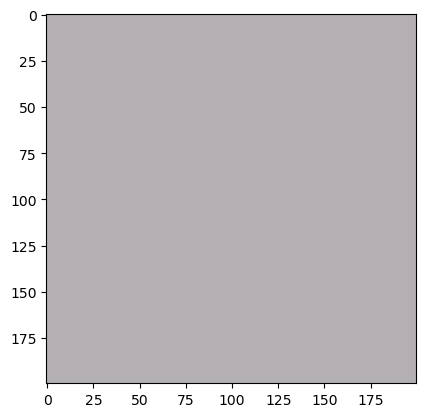

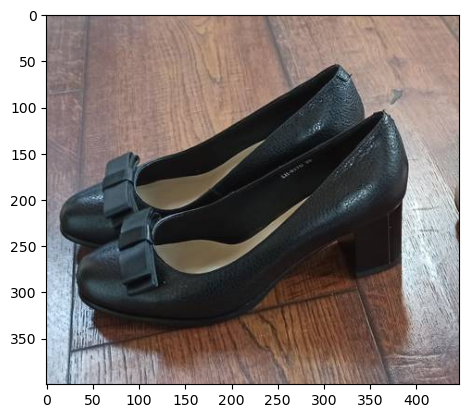

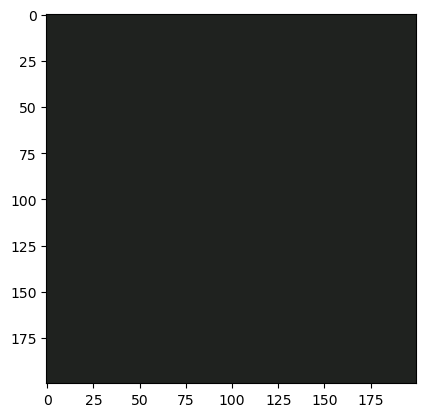

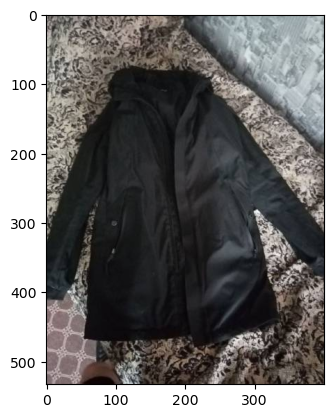

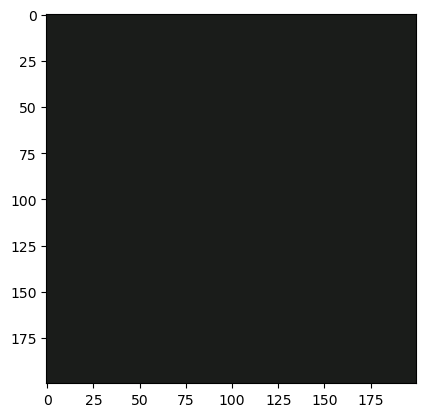

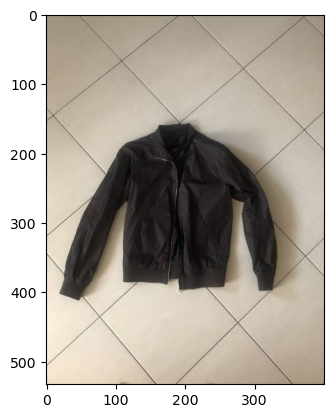

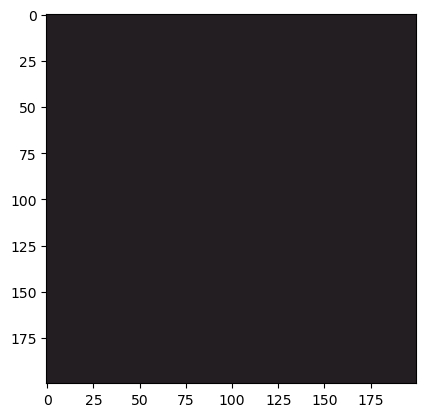

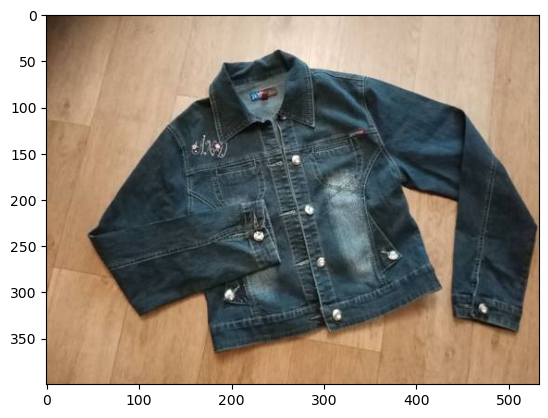

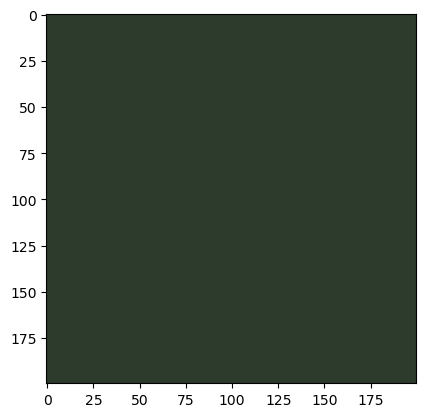

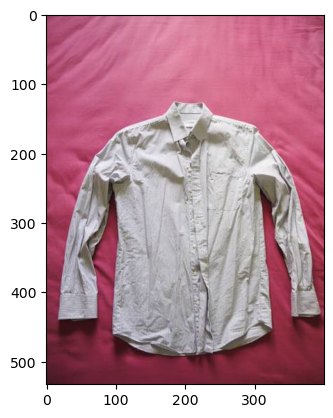

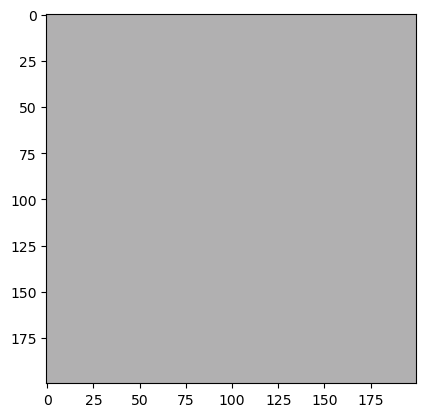

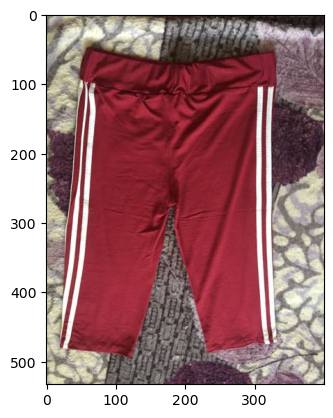

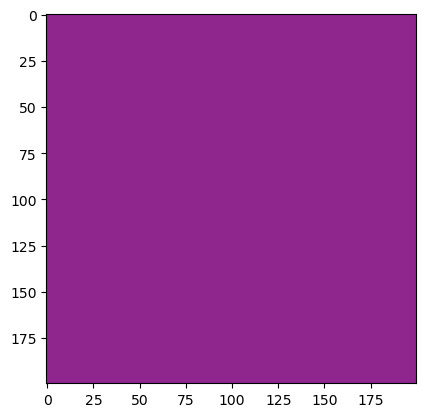

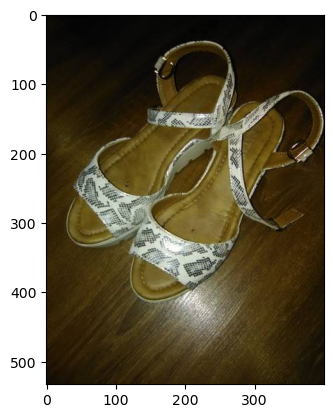

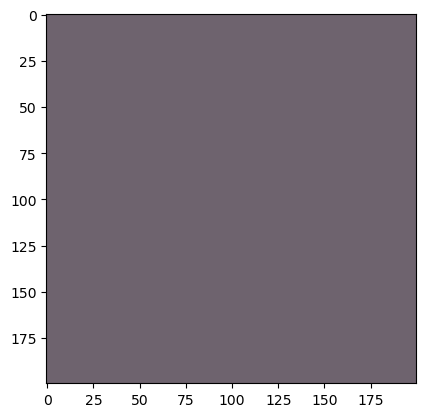

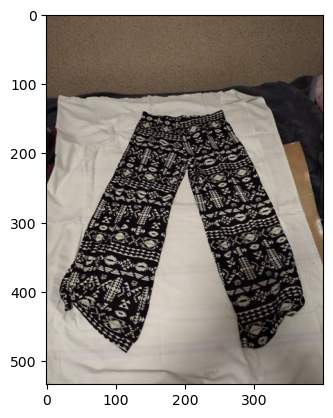

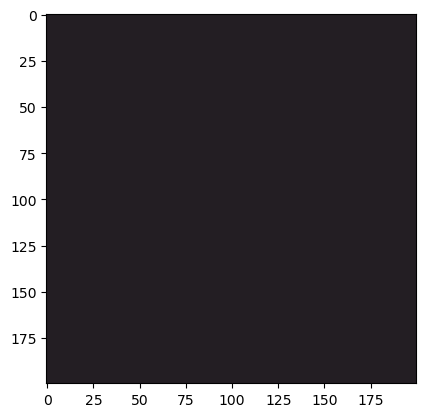

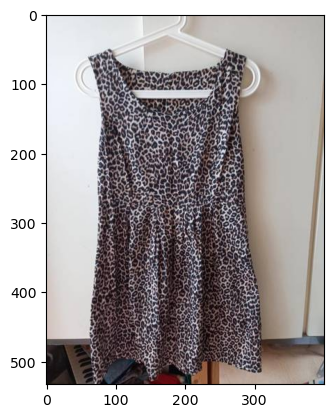

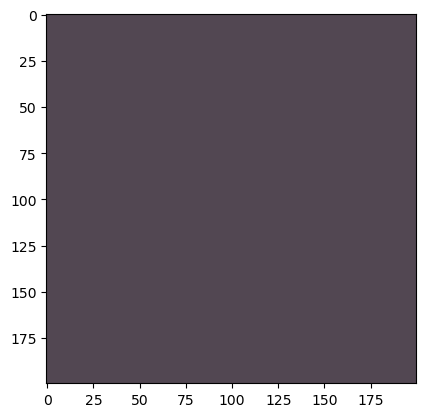

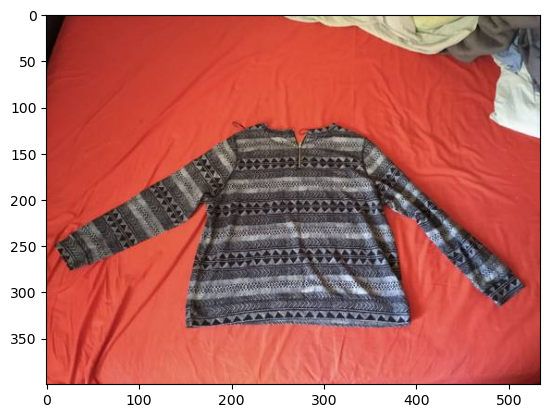

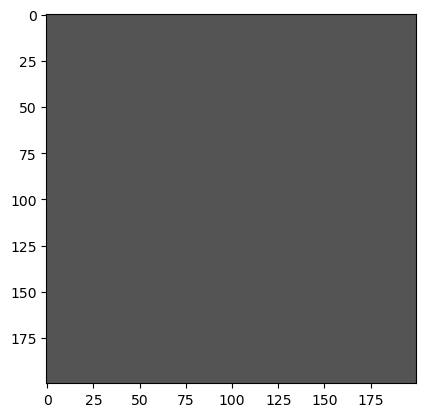

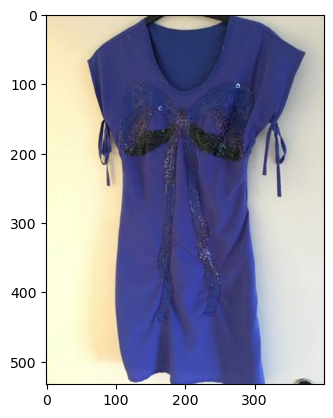

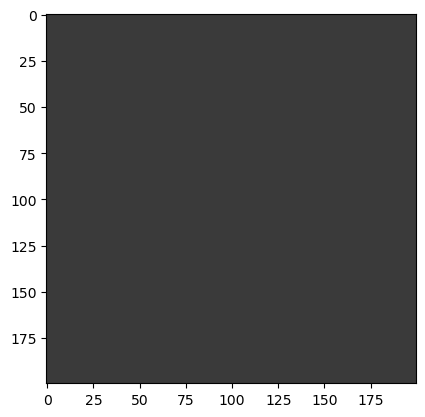

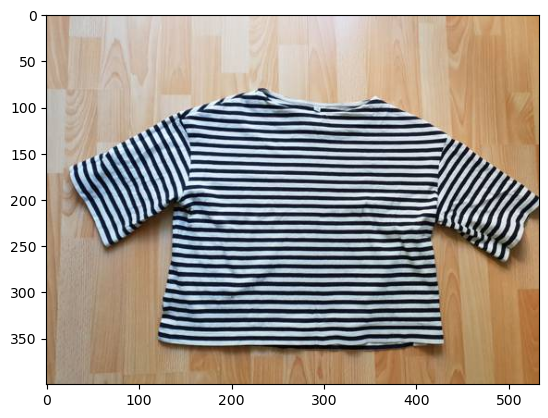

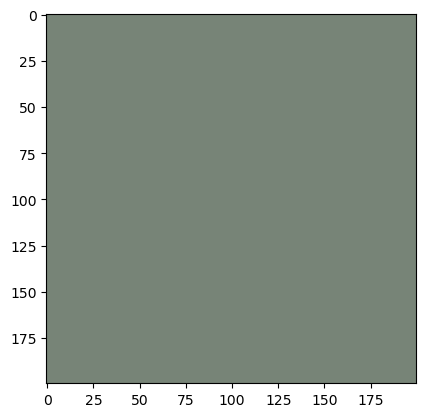

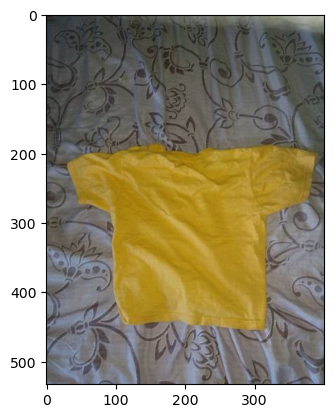

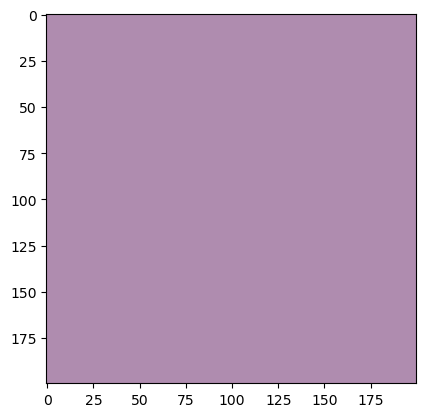

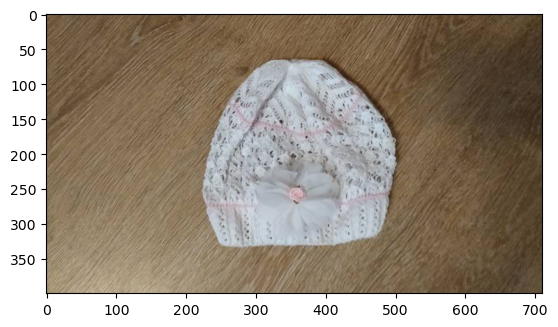

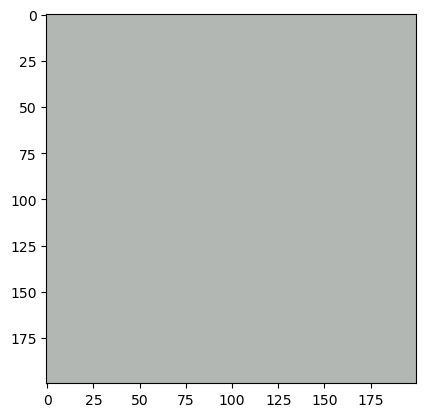

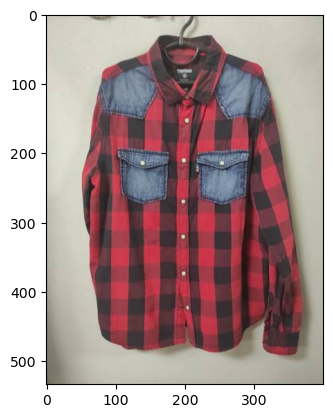

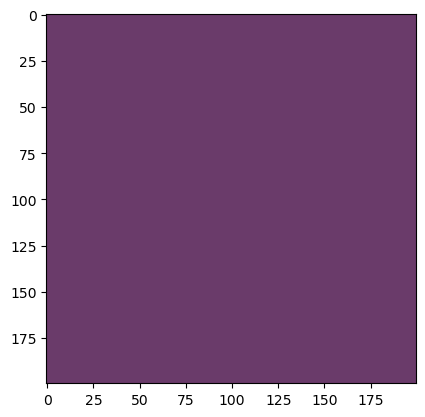

1016    None
1845    None
1903    None
1994    None
723     None
1411    None
2002    None
1889    None
1616    None
1635    None
1257    None
1523    None
864     None
743     None
142     None
725     None
947     None
904     None
1326    None
1826    None
dtype: object

In [15]:
def plot_clothes(x):
    
    img = cv2.cvtColor(cv2.imread(x['clothing_path']), cv2.COLOR_BGR2RGB)
    median_color = [x['R_median'], x['G_median'], x['B_median']]
    colored_square = create_colored_square(200, median_color)
    
    plt.imshow(img)
    plt.show()
    plt.imshow(colored_square)
    plt.show()

df_clothes = pd.read_csv("clothes.csv")

df_clothes.sample(20).apply(plot_clothes, axis = 1)

In [13]:
median_color

array([152, 151, 170], dtype=uint8)